# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


dc0d70b879e0f386f28168386e95eb93


## Generate Cities List

In [91]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#Sample Set
#lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
print(cities)

# Print the city count to confirm sufficient count
len(cities)

['longyearbyen', 'karakol', 'mount pleasant', 'bluff', 'atuona', 'marzuq', 'east london', 'ksenyevka', 'tasiilaq', 'busselton', 'saskylakh', 'venado tuerto', 'hilo', 'talcahuano', 'punta arenas', 'urdzhar', 'port alfred', 'ler', 'rawson', 'atasu', 'castro', 'jijiang', 'codrington', 'mega', 'bengkulu', 'severo-kurilsk', 'grand gaube', 'nizhneyansk', 'avarua', 'albany', 'illoqqortoormiut', 'springbok', 'yerbogachen', 'kapaa', 'tougue', 'tiksi', 'cape town', 'artyom', 'annau', 'puerto ayora', 'isangel', 'bambous virieux', 'rajo khanani', 'saint-philippe', 'tommot', 'aksu', 'souillac', 'hermanus', 'colquechaca', 'ushuaia', 'hovd', 'viedma', 'mataura', 'rikitea', 'desaguadero', 'nikolskoye', 'kamenskoye', 'constitucion', 'manicore', 'horta', 'grand river south east', 'mar del plata', 'narsaq', 'abalak', 'ipixuna', 'rabo de peixe', 'hobart', 'qaanaaq', 'mys shmidta', 'marcona', 'victoria', 'amderma', 'flinders', 'dikson', 'bandarbeyla', 'arman', 'homer', 'tuktoyaktuk', 'avera', 'chapais', 'p

621

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
#print(base_url)

# Create the lists to hold relative data
found_cities =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Create a query url for each city in the cities list to get json response

print("Processing API calls from Open Weather")
for city in cities:
    
    time.sleep(1)
         
    # Create API url for each city
    query_url = base_url +"&q=" + city

    
    # Get json respose for each city
    response = requests.get(query_url).json()

   # Add the values to the lists
    try:       
        found_cities.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])

        print(f"{city} was found in weather data") 
        
    except KeyError:
        print(f"{city} not found. Skipped")
        pass
        
print("End of City list")



Processing API calls from Open Weather
longyearbyen was found in weather data
karakol was found in weather data
mount pleasant was found in weather data
bluff was found in weather data
atuona was found in weather data
marzuq was found in weather data
east london was found in weather data
ksenyevka not found. Skipped
tasiilaq was found in weather data
busselton was found in weather data
saskylakh was found in weather data
venado tuerto was found in weather data
hilo was found in weather data
talcahuano was found in weather data
punta arenas was found in weather data
urdzhar not found. Skipped
port alfred was found in weather data
ler was found in weather data
rawson was found in weather data
atasu was found in weather data
castro was found in weather data
jijiang was found in weather data
codrington was found in weather data
mega was found in weather data
bengkulu was found in weather data
severo-kurilsk was found in weather data
grand gaube was found in weather data
nizhneyansk not fou

In [93]:
#Create Dictionary

weather_raw_data = {
    "City": found_cities,
    "Latitude": lat,
    "Lng": lng,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
    "Date":date
    }


#Create Data Frame
weather_df = pd.DataFrame.from_dict(weather_raw_data, orient= 'columns')

#Modify Date field


#export to cs
weather_df.to_csv("output_data/cities.csv", index = False)
weather_df

,City,Latitude,Lng,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,Longyearbyen,78.22,15.64,75,SJ,1603124989,79,26.60,6.93
1,Karakol,42.49,78.39,0,KG,1603124767,50,43.54,1.70
2,Mt. Pleasant,32.79,-79.86,1,US,1603124904,57,78.80,4.70
3,Bluff,-46.60,168.33,79,NZ,1603124992,75,48.99,17.00
4,Atuona,-9.80,-139.03,6,PF,1603124993,74,78.12,22.15
...,...,...,...,...,...,...,...,...,...
560,Båtsfjord,70.63,29.72,75,NO,1603125653,81,33.80,12.75
561,Marsh Harbour,26.54,-77.06,100,BS,1603125654,71,82.31,18.12
562,Lakatoro,-16.10,167.42,37,VU,1603125655,73,75.20,7.56
563,Bayan,46.08,127.40,0,CN,1603125656,72,41.81,4.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

In [ ]:
plt.scatter(weather_df['Latitude'],weather_df['Max Temp'],edgecolors='black',facecolors='b')
plt.title("Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.savefig(f"Latitude vs. Max Temperature {title_date}.png")

### Latitude vs. Humidity Plot

In [ ]:
title_date = (weather_df['Date'][0])

plt.scatter(weather_df['Latitude'],weather_df['Humidity'],edgecolors='black',facecolors='b')
plt.title(f"City Latitude vs. Humidity {title_date}")
plt.xlabel('Latitude')
plt.ylabel('Max Humidity')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.savefig(f"{plt.title}.png")

### Latitude vs. Cloudiness Plot

In [ ]:
title_date = (weather_df['Date'][0])

plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],edgecolors='black',facecolors='b')
plt.title =("Latitude vs. Cloudiness" + title_date)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.savefig(f"Latitude vs. Cloudiness {title_date}.png")

### Latitude vs. Wind Speed Plot

TypeError: 'str' object is not callable

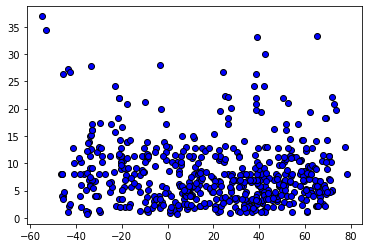

In [64]:
title_date = (weather_df['Date'][0])

plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors='b')
plt.title(f"City Latitude vs. Wind Speed {title_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.savefig(f"City Latitude vs. Wind Speed {title_date}.png")

## Linear Regression

### Write linear regression plot function (optional)

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression